<center><h1>"your_off-facebook_activity Report</h1></center><br>
EMAT 22110 - Data in Emerging Media and Technology <br>
Author: Hannah Haswell <br>
Created: 2/23/21 <br>
Last Updated: 3/2/21

## Purpose

In this data report, I will be analyzing a my Facebook data. I chose the file, "your_off-facebook_activity" file to dig into and reflect on. I will show a variety of analyses and displays of data that we will be able to draw conclusions from about my off Facebook activity.

## 1. Overview

My <b>hypothesis</b> for this report is: One way Facebook connects to non-Facebook apps is by using my Facebook credentials as login information, therefore the apps that I login with will be advertised more on my feed as well as shown in my off-Facebook activity data. Below, I am importing the libraires I will be using throughout this report as well as loading in my data from my "your_off-facebook_activity" file.


In [169]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from scipy import stats

In [170]:
with open(r"C:\Users\hhasw\Desktop\Junior Year\Data in Emerging Media and Technology\Facebook Data JSON\ads_and_businesses\your_off-facebook_activity.json") as f:
    act = json.load(f)
print(act.keys())

dict_keys(['off_facebook_activity'])


## 2. The Data

I got this data from my personal Facebook account. I downloaded all my data and chose the file, "your_off-facebook_activity" file. The raw data structure is a list and the two data types are 'name' and 'events', see how I found this out below. Since this is my own personal data from my Facebook account and I downloaded it straight from https://www.facebook.com/, I I trust this data. If you would like access your own Facebook data, follow these steps: https://www.facebook.com/help/212802592074644/?helpref=search&query=download%20data&search_session_id=d85c62aeaf8f19fb04548a357e020a0d&sr=0

In [171]:
type(act['off_facebook_activity'])

list

In [172]:
act['off_facebook_activity'][0]

{'name': 'microsoft.com',
 'events': [{'id': 1418091021830447,
   'type': 'COMPLETE_REGISTRATION',
   'timestamp': 1611283260},
  {'id': 1770559986549030, 'type': 'VIEW_CONTENT', 'timestamp': 1611283260}]}

In [173]:
act['off_facebook_activity'][0].keys()

dict_keys(['name', 'events'])

In [174]:
act['off_facebook_activity'][0]['events'][0]['type']

'COMPLETE_REGISTRATION'

## 3. Data Preparation

In [175]:
act['off_facebook_activity'][0]['events'][0]['type'] == 'COMPLETE_REGISTRATION'

True

Below, I chose to use the <i>Loop Method</i>, which is selecting the value from the 'name' key. The events.append is getting the length of the 'events' list. For the other 6 variables, the variable <i>i</i>  is used to iterate over the list of app dictionaries. The result of this is a series of lists containing the data of interest.

In [176]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = []
view = []
cats = []

for i in act['off_facebook_activity']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    actapp.append(len([x for x in i['events'] if x['type'] == 'COMPLETE_REGISTRATION']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    search.append(len([x for x in i['events'] if x['type'] == 'SEARCH']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    ad.append(len([x for x in i['events'] if x['type'] == 'AD_REQUEST']))
    view.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))
    cats.append(len([x for x in i['events'] if x ['type'] == 'CATEGORY']))

Below, I am creating a DataFrame from pandas. In this particular DataFrame, I am first creating an empty DataFrame and naming the column names. Then, I assigned the lists of data to each column name.

In [177]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views', 'Category'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent['Activate App'] = actapp
appbyevent['Custom'] = custom
appbyevent['Search'] = search
appbyevent['View Content'] = viewc
appbyevent['Ad Request'] = ad
appbyevent['Page Views'] = view
appbyevent['Category'] = cats
appbyevent.head()

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views,Category
0,microsoft.com,2,1,0,0,1,0,0,0
1,etsy.com,31,0,0,0,11,0,20,0
2,groupon.com,1,0,0,0,0,0,1,0
3,yelp.com,16,0,8,0,4,0,4,0
4,vagaro.com,1,0,0,0,0,0,1,0


Here I am showing all of the data for all of the apps connected to my Facebook.

In [178]:
sub_apps = appbyevent[['App', 'Event Count', 'Activate App', 'Custom', 'Ad Request', 'View Content', 'Page Views', 'Category']].loc[appbyevent['Event Count'] > 10]
sub_apps

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views,Category
1,etsy.com,31,0,0,0,11,20,0
3,yelp.com,16,0,8,0,4,4,0
7,linkedin.com,120,0,0,0,47,0,0
9,kent.edu,109,0,4,0,17,88,0
10,Adobe Lightroom Photo Editor,31,0,0,0,0,0,0
11,Ulta Beauty,14,0,9,0,0,0,0
24,ups.com,16,0,0,0,0,16,0
35,J. Crew Inc.,17,0,0,0,10,7,0
44,quizlet.com,109,0,1,0,99,1,0
51,shein.com,13,0,0,0,6,4,0


Below I am singling out the app names to determine if the are a website or an app.

In [179]:
sub_apps['App']

1                            etsy.com
3                            yelp.com
7                        linkedin.com
9                            kent.edu
10       Adobe Lightroom Photo Editor
11                        Ulta Beauty
24                            ups.com
35                       J. Crew Inc.
44                        quizlet.com
51                          shein.com
55                     luckybrand.com
57             dickssportinggoods.com
61                         burton.com
63                     eventbrite.com
84                        hubspot.com
109                      cyclebar.com
130                      spectrum.com
136               urbanoutfitters.com
137                     lululemon.com
141                       dropbox.com
175                          LinkedIn
190            TikTok - Make Your Day
224                    freepeople.com
294                       wayfair.com
320                          cnet.com
328                            ae.com
375         

In [180]:
cats = ['site', 'site', 'site', 'site', 'app', 'app', 'site', 'app', 'site', 'site','site','site','site','site','site','site','site','site','site','site', 'app', 'app', 'site', 'site', 'site', 'site', 'site', 'site', 'app', 'site']
len(cats)

30

Here I am setting the column 'Category' to equal <i>cats</i> so that 'site' or 'app' is displayed in the correlating field in the column 'Category'.

In [181]:
sub_apps['Category'] = cats
sub_apps

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views,Category
1,etsy.com,31,0,0,0,11,20,site
3,yelp.com,16,0,8,0,4,4,site
7,linkedin.com,120,0,0,0,47,0,site
9,kent.edu,109,0,4,0,17,88,site
10,Adobe Lightroom Photo Editor,31,0,0,0,0,0,app
11,Ulta Beauty,14,0,9,0,0,0,app
24,ups.com,16,0,0,0,0,16,site
35,J. Crew Inc.,17,0,0,0,10,7,app
44,quizlet.com,109,0,1,0,99,1,site
51,shein.com,13,0,0,0,6,4,site


## 4. Data Visualization, Statistical Summaries and Analyses

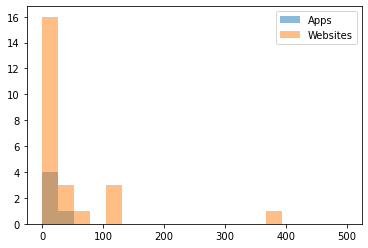

In [182]:
bins = np.linspace(0, 500, 20)
plt.hist(sub_apps['Event Count'].loc[sub_apps['Category'] == 'app'], bins, alpha = 0.5, label = "Apps")
plt.hist(sub_apps['Event Count'].loc[sub_apps['Category'] == 'site'], bins, alpha = 0.5, label = "Websites")
plt.legend(loc = 'upper right')
plt.show()

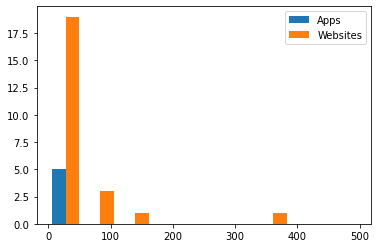

In [183]:
bins = np.linspace(0, 500, 10)
apps = sub_apps['Event Count'].loc[sub_apps['Category'] == 'app']
sites = sub_apps['Event Count'].loc[sub_apps['Category'] == 'site']
plt.hist([apps, sites], bins, label = ['Apps', 'Websites'])
plt.legend(loc = 'upper right')
plt.show()

The two graphs above show that websites show more advertisements on my feed then apps.

Below, I ran a ttest_ind() to show my statistical summary and analyses of my off Facebook activity.

In [184]:
ttest_eventcount = stats.ttest_ind(sub_apps['Event Count'].loc[sub_apps['Category'] == 'app'], sub_apps['Event Count'].loc[sub_apps['Category'] == 'site'])
ttest_eventcount.statistic

1.7577324193579063

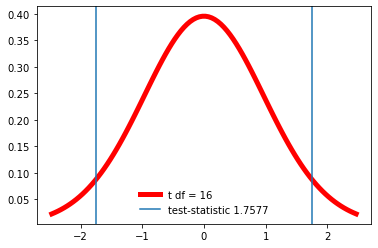

In [185]:
df1 = (len(apps) - 1) + (len(sites) - 1)
#df2 = 100
fig, ax1 = plt.subplots(1,1)
x1 = np.linspace(stats.t.ppf(0.01, df1), stats.t.ppf(0.99, df1), 100)
ax1.plot(x1, stats.t.pdf(x1, df1), 'r-', lw = 5, label = 't df = 16')
#x2 = np.linspace(stats.t.ppf(0.01, df2), stats.t.ppf(0.99, df2), 100)
#ax1.plot(x2, stats.t.pdf(x2, df2), 'k-', lw = 5, label = 't df = 100')
ax1.axvline(x=ttest_eventcount.statistic, label = 'test-statistic 1.7577')
ax1.axvline(x=-ttest_eventcount.statistic, label = '_nolegend_')
ax1.legend(loc = 'best', frameon = False)
plt.show()

In [186]:
ttest_eventcount.pvalue

0.08972248935223603

The graph below shows that I have activated Facebook through more websites than apps.

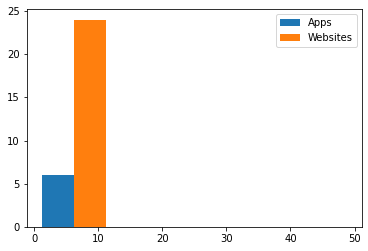

In [187]:
bins = np.linspace(0, 50, 5)
apps = sub_apps['Activate App'].loc[sub_apps['Category'] == 'app']
sites = sub_apps['Activate App'].loc[sub_apps['Category'] == 'site']
plt.hist([apps, sites], bins, label = ['Apps', 'Websites'])
plt.legend(loc = 'upper right')
plt.show()

In [188]:
ttest_activateapp = stats.ttest_ind(sub_apps['Activate App'].loc[sub_apps['Category'] == 'app'], sub_apps['Activate App'].loc[sub_apps['Category'] == 'site'])
ttest_activateapp

Ttest_indResult(statistic=-0.4934351637951689, pvalue=0.6255533444804922)

The graph below shows that I view more ad content from webistes than apps.

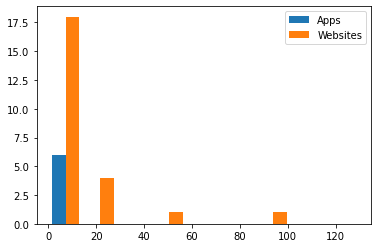

In [189]:
bins = np.linspace(0, 130, 10)
apps = sub_apps['View Content'].loc[sub_apps['Category'] == 'app']
sites = sub_apps['View Content'].loc[sub_apps['Category'] == 'site']
plt.hist([apps, sites], bins, label = ['Apps', 'Websites'])
plt.legend(loc = 'upper right')
plt.show()

In [190]:
ttest_viewcontent = stats.ttest_ind(sub_apps['View Content'].loc[sub_apps['Category'] == 'app'], sub_apps['View Content'].loc[sub_apps['Category'] == 'site'])
ttest_viewcontent

Ttest_indResult(statistic=-1.2080159460360296, pvalue=0.23714563299203242)

## 5. Conclusions

Let's revisit my hypothesis.

<b>Hypothesis:</b> One way Facebook connects to non-Facebook apps is by using my Facebook credentials as login information, therefore the apps that I login with will be advertised more on my feed as well as shown in my off-Facebook activity data.

From this I need to analyze my data and pull out what apps and sites I have used Facebook credentials to login with. 

The apps and sites I have logged in with my Facebook credentials are: <br>
-etsy.com <br>
-yelp.com <br>
-eventbrite.com <br>
-dropbox.com <br>
-TikTok - Make Your Day <br>
-wayfair.com <br>
-cnet.com <br>
-Canva - Graphic Design Creator <br>

This shows that 8/30 (~27%) of the apps and sites connected to my Facebook through my login credentials show activity. According to my hypothesis, I thought that the apps or sites connected to my Facebook through my login credentials would show more ads. Let's compare the event count of the apps or sites I have logged in with my Facebook credentials vs. the apps or sites I have not.

Event count for apps or sites I have logged in with Facebook credentials:<br>

-etsy.com = 31<br>
-yelp.com = 16<br>
-eventbrite.com = 40<br>
-dropbox.com = 11<br>
-TikTok - Make Your Day = 1295<br>
-wayfair.com = 11<br>
-cnet.com = 11<br>
-Canva - Graphic Design Creator = 11<br>

<b>Event Count Total = 1,526</b>

Event count for apps or sites I have <b>NOT</b> logged in with Facebook credentials:<br>

-linkedin.com = 120<br>
-kent.edu = 109<br>
-Adobe Lightroom Photo Editor = 31<br>
-Ulta Beauty = 14<br>
-ups.com = 16<br>
-J. Crew Inc. = 17<br>
-quizlet.com = 109<br>	
-shein.com = 13<br>
-luckybrand.com = 12<br>	
-dickssportinggoods.com = 12<br>
-burton.com = 12<br>
-hubspot.com = 387<br>
-cyclebar.com = 13<br>
-spectrum.com = 14<br>
-urbanoutfitters.com = 13<br>
-lululemon.com = 33<br>
-LinkedIn = 25<br>
-freepeople.com = 16<br>	
-ae.com = 11<br>
-oreilly.com = 68<br>
-campusdish.com = 13<br>	
-timesheets.com = 19

<b>Event Count Total = 1,077</b>

So, the event count for the apps or sites I have logged in with Facebook credentials is 1,526 and the event count for the apps or sites I have <b>NOT</b> logged in with Facebook credentials is 1,077. This shows that the apps or sites I have logged in with my Facebook credentials are advertised more on my feed. Therefore, my hypothesis was correct because I get more advertisements from apps or sites I have logged in with my Facebook credentials than apps or sites that I have <b>NOT</b> logged in with my Facebook credentials.

## 6. Limitations, Alternative Approaches, and Next Steps

Some limitations I came across while doing this report is that I could not easily depict what apps or sites I used my Facebook login credentials to login. An alternative approach to this would be to find another data file showing this data or change my hypothesis to make this data report better. My next steps would be to find data that shows where I have used my Facebook login credentials in other apps and sites or research each site to see if I have it linked to Facebook.